In [141]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import scipy as sp
from pydataset import data
from env import get_db_url, user, password, host
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

import acquire as acq
import os
directory = os.getcwd()

## Part I
### **Section 1 - iris_db:** Using iris data from our MySQL server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data.

In [142]:
iris = acq.prep_iris(acq.get_iris_data())
iris.head(60)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


In [143]:
train_iris, validate_iris, test_iris = acq.split_data(iris, 'iris')
train_iris.shape, validate_iris.shape, test_iris.shape

((90, 5), (30, 5), (30, 5))

In [144]:
iris.value_counts()

species     sepal_length  sepal_width  petal_length  petal_width
virginica   5.8           2.7          5.1           1.9            2
versicolor  6.7           3.0          5.0           1.7            1
                          3.1          4.7           1.5            1
            6.8           2.8          4.8           1.4            1
            6.9           3.1          4.9           1.5            1
            7.0           3.2          4.7           1.4            1
virginica   4.9           2.5          4.5           1.7            1
            5.6           2.8          4.9           2.0            1
            5.7           2.5          5.0           2.0            1
setosa      4.3           3.0          1.1           0.1            1
virginica   5.8           2.8          5.1           2.4            1
            5.9           3.0          5.1           1.8            1
            6.0           2.2          5.0           1.5            1
                         

### 2. Univariate Stats
#### - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [145]:
cat_cols, num_cols = [], []
for col in train_iris.columns:
    if train_iris[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if train_iris[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [146]:
num_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Distribution of sepal_length


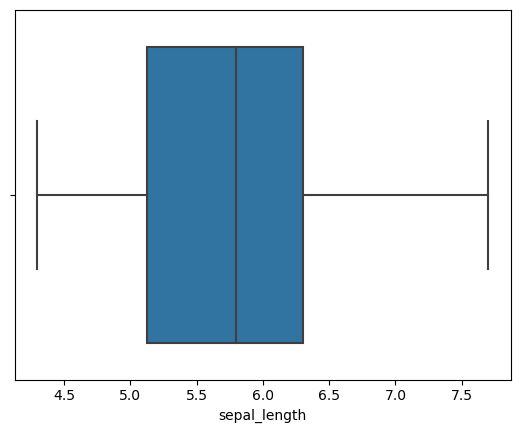

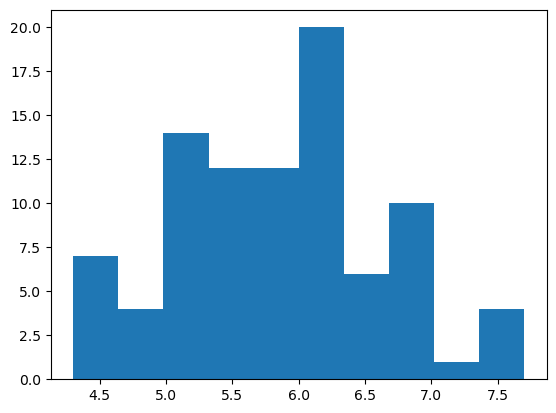

count    90.000000
mean      5.836667
std       0.790314
min       4.300000
25%       5.125000
50%       5.800000
75%       6.300000
max       7.700000
Name: sepal_length, dtype: float64
Distribution of sepal_width


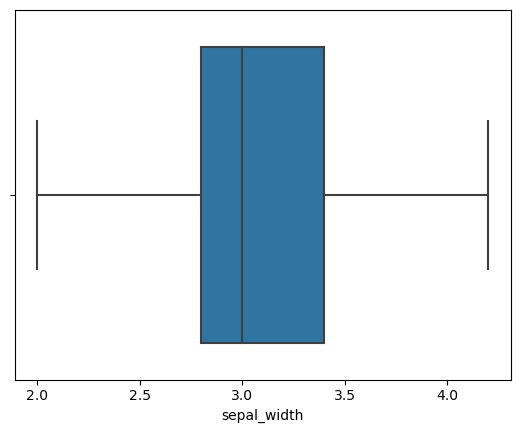

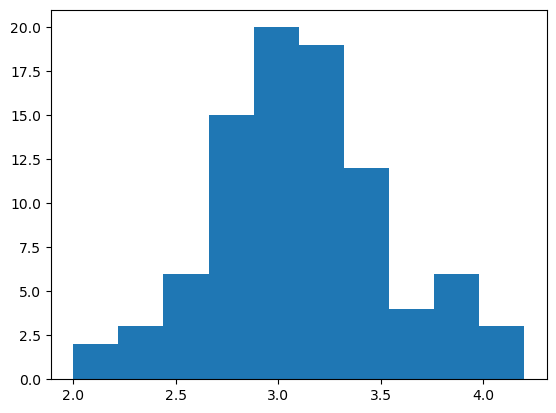

count    90.000000
mean      3.094444
std       0.430928
min       2.000000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.200000
Name: sepal_width, dtype: float64
Distribution of petal_length


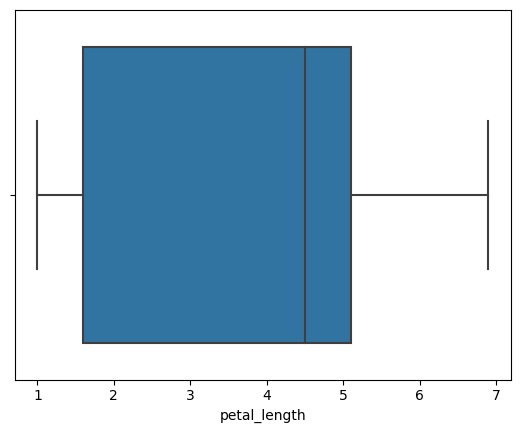

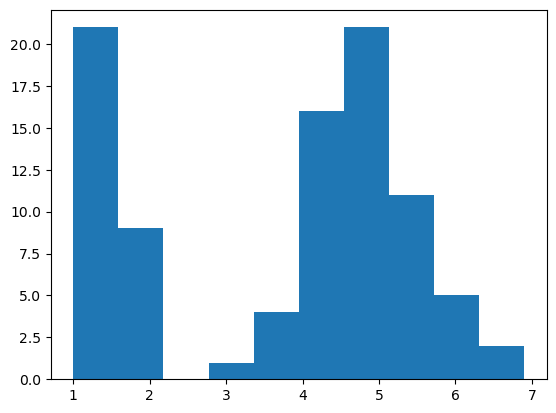

count    90.000000
mean      3.764444
std       1.754437
min       1.000000
25%       1.600000
50%       4.500000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
Distribution of petal_width


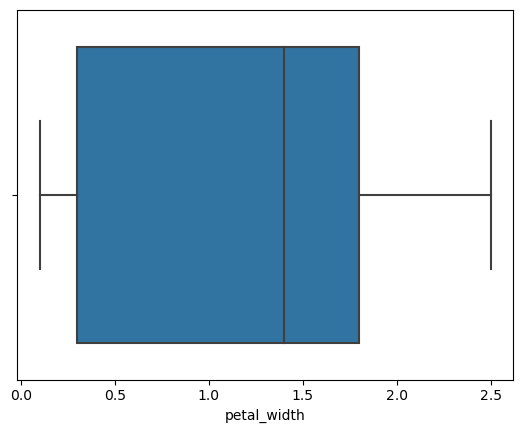

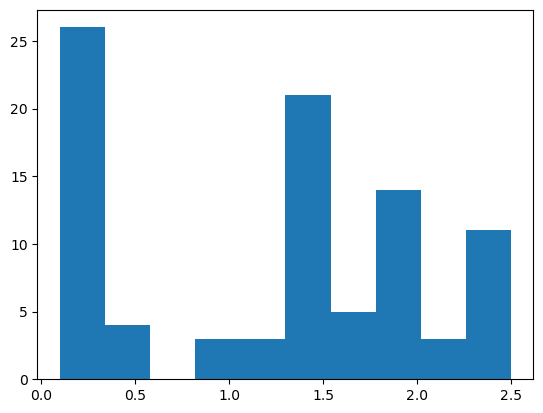

count    90.000000
mean      1.216667
std       0.784148
min       0.100000
25%       0.300000
50%       1.400000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [147]:
for col in num_cols:
    # print out a report header with the column name
    print(f'Distribution of {col}')
    # present a box plot of the information
    # (gives good info about where outliers sit)
    sns.boxplot(data=train_iris, x=col)
    plt.show()
    # present a histogram
    # histogram will establish how Normal our distribution is
    plt.hist(train_iris[col])
    plt.show()
    print(train_iris[col].describe())
    print('===================')

#### - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [148]:
cat_cols

['species']

Distribution of species


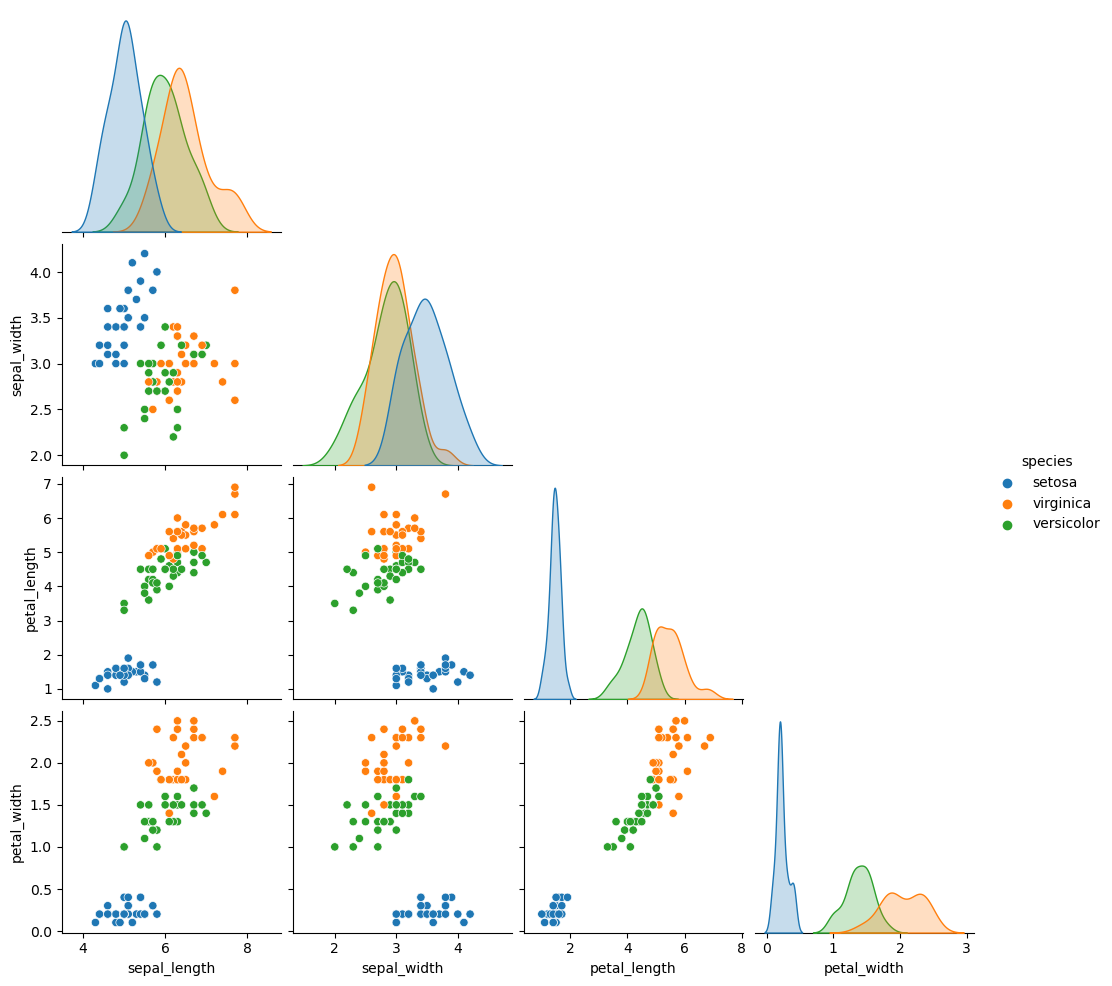

Axes(0.125,0.11;0.775x0.77)


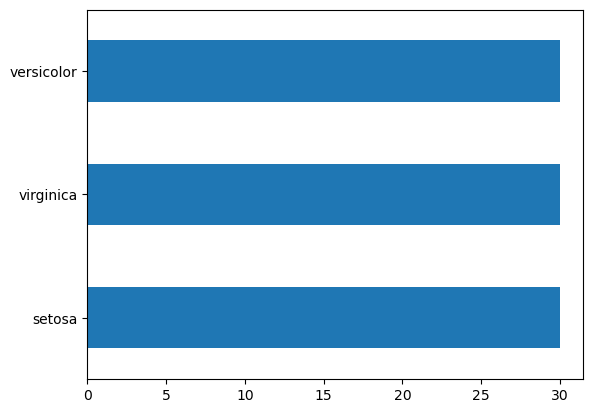

count         90
unique         3
top       setosa
freq          30
Name: species, dtype: object


In [149]:
for col in cat_cols:
    # print out a report header with the column name
    print(f'Distribution of {col}')
    # present a box plot of the information
    # (gives good info about where outliers sit)
    sns.pairplot(data=train_iris, corner=True, hue='species')
    plt.show()
    # present a bar chart
    # bar chart will establish how Normal our distribution is
    print(train_iris[col].value_counts().plot.barh())
    plt.show()
    print(train_iris[col].describe())
    print('===================')

#### - Document takeaways & any actions.

In [150]:
# petal_length and petal_width have the most noticeable relationship between the species
# 

### 3. Bivariate Stats
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
- For each measurement type, compute the descriptive statistics for each species.

- Document takeaways & any actions.

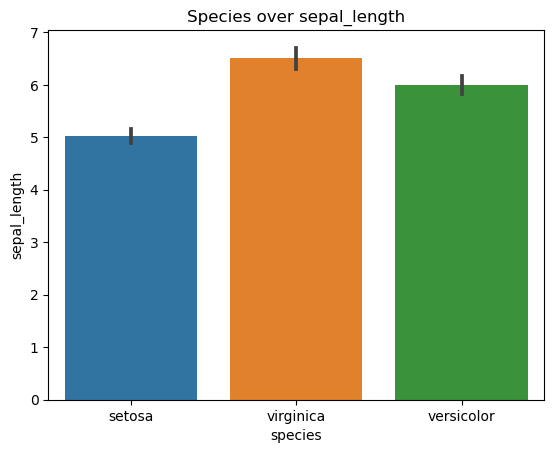

count    90.000000
mean      5.836667
std       0.790314
min       4.300000
25%       5.125000
50%       5.800000
75%       6.300000
max       7.700000
Name: sepal_length, dtype: float64


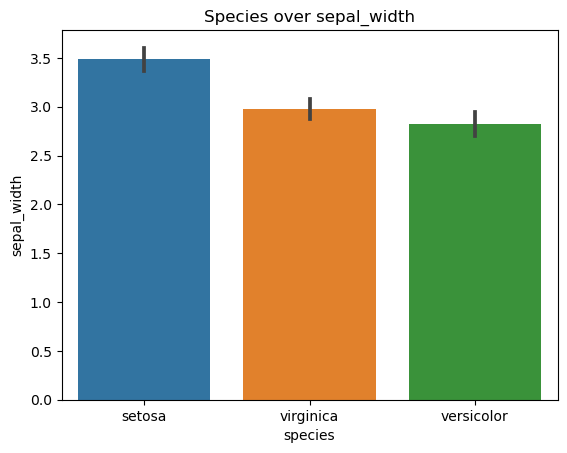

count    90.000000
mean      3.094444
std       0.430928
min       2.000000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.200000
Name: sepal_width, dtype: float64


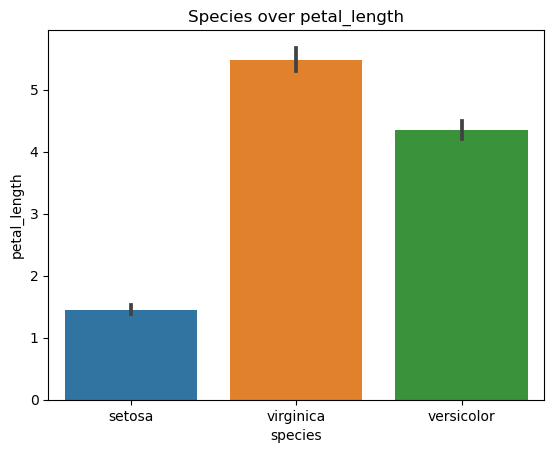

count    90.000000
mean      3.764444
std       1.754437
min       1.000000
25%       1.600000
50%       4.500000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


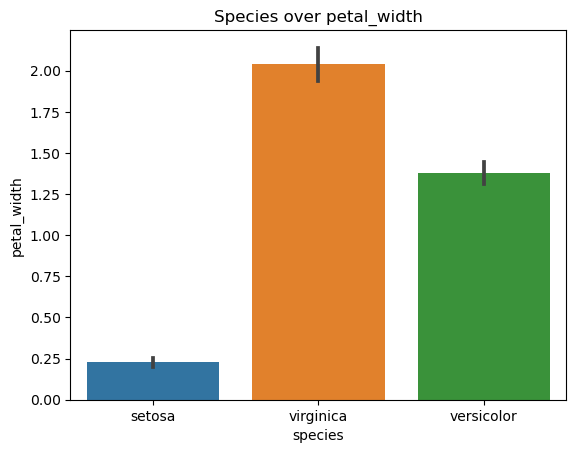

count    90.000000
mean      1.216667
std       0.784148
min       0.100000
25%       0.300000
50%       1.400000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [151]:
for col in num_cols:
    sns.barplot(
    data=train_iris,
    x='species',
    y=col)
    plt.title(f'Species over {col}')
    plt.show()
    print(train_iris[col].describe())
    print('===================')

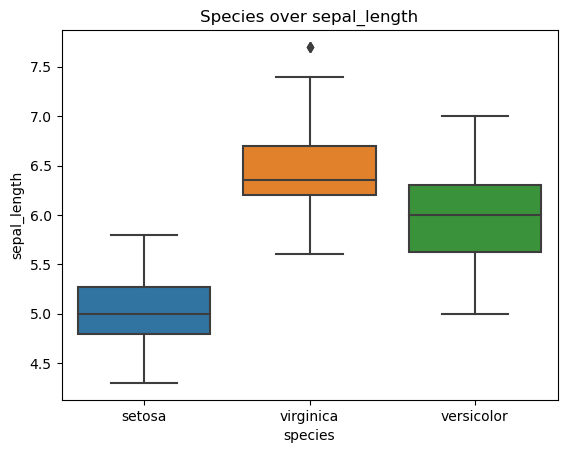

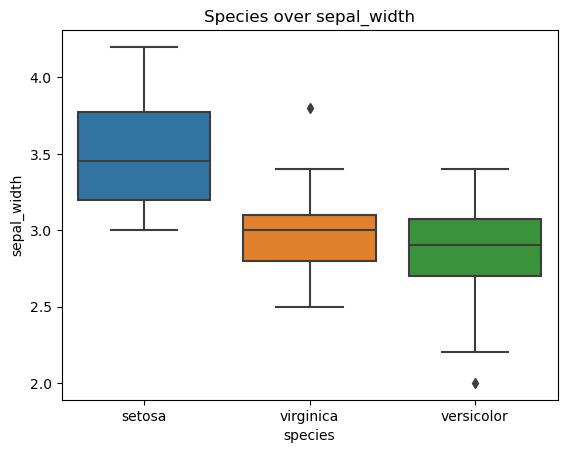

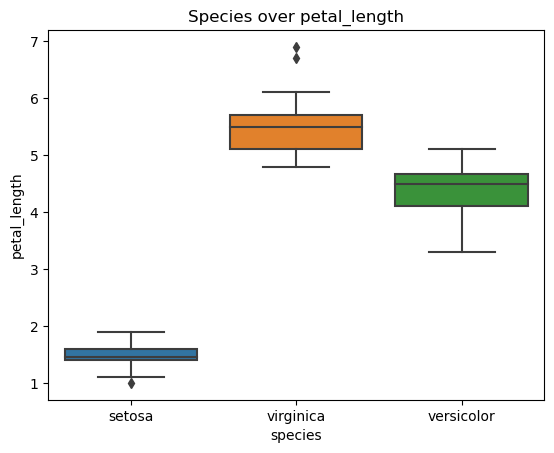

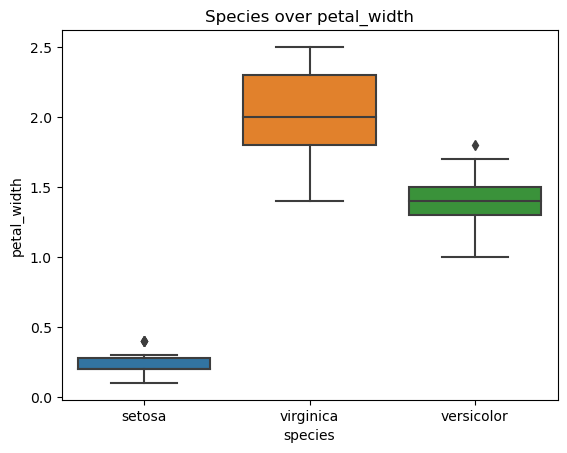

In [152]:
for col in num_cols:
    sns.boxplot(
    data=train_iris,
    x='species',
    y=col)
    plt.title(f'Species over {col}')
    plt.show()

### - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

### $H_0$: There is no difference in the mean measurements from the species tested.

### $H_a$:There is a signficant difference in mean measurements from the species tested.

In [153]:
column_to_compare = 'petal_width'  # Replace this with the column you're interested in

sample_virginica = train_iris[train_iris.species == 'virginica'][column_to_compare].dropna()
sample_versicolor = train_iris[train_iris.species == 'versicolor'][column_to_compare].dropna()

stat, p_val = stats.mannwhitneyu(sample_virginica, sample_versicolor)

if p_val < 0.05:
    print('We can reject the null hypothesis; the distributions are different.')
else:
    print('We cannot reject the null hypothesis')


We can reject the null hypothesis; the distributions are different.


In [154]:
column_to_compare = 'petal_length'  # Replace this with the column you're interested in

sample_virginica = train_iris[train_iris.species == 'virginica'][column_to_compare].dropna()
sample_versicolor = train_iris[train_iris.species == 'versicolor'][column_to_compare].dropna()

stat, p_val = stats.mannwhitneyu(sample_virginica, sample_versicolor)

if p_val < 0.05:
    print('We can reject the null hypothesis; the distributions are different.')
else:
    print('We cannot reject the null hypothesis')

We can reject the null hypothesis; the distributions are different.


In [155]:
column_to_compare = 'sepal_width'  # Replace this with the column you're interested in

sample_virginica = train_iris[train_iris.species == 'virginica'][column_to_compare].dropna()
sample_versicolor = train_iris[train_iris.species == 'versicolor'][column_to_compare].dropna()

stat, p_val = stats.mannwhitneyu(sample_virginica, sample_versicolor)

if p_val < 0.05:
    print('We can reject the null hypothesis; the distributions are different.')
else:
    print('We cannot reject the null hypothesis')

We cannot reject the null hypothesis


In [156]:
column_to_compare = 'sepal_length'  # Replace this with the column you're interested in

sample_virginica = train_iris[train_iris.species == 'virginica'][column_to_compare].dropna()
sample_versicolor = train_iris[train_iris.species == 'versicolor'][column_to_compare].dropna()

stat, p_val = stats.mannwhitneyu(sample_virginica, sample_versicolor)

if p_val < 0.05:
    print('We can reject the null hypothesis; the distributions are different.')
else:
    print('We cannot reject the null hypothesis')

We can reject the null hypothesis; the distributions are different.


### 4. Multivariate Stats
#### - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

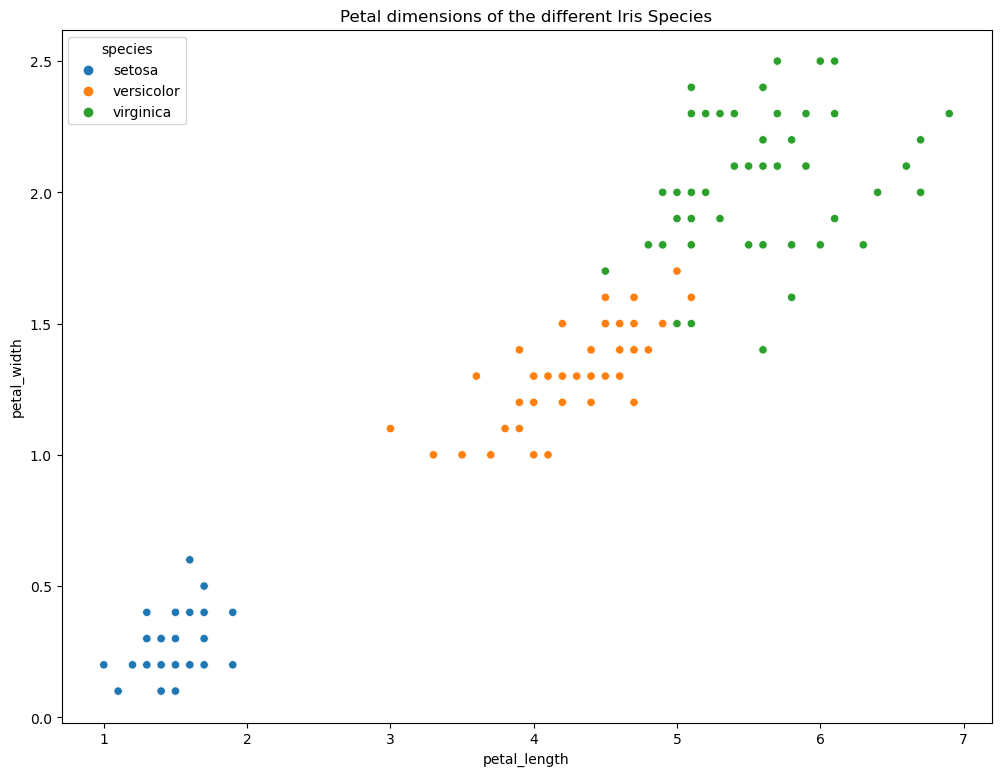

In [157]:
plt.figure(figsize=(12,9))
plt.title('Petal dimensions of the different Iris Species')
sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue='species')
plt.show()

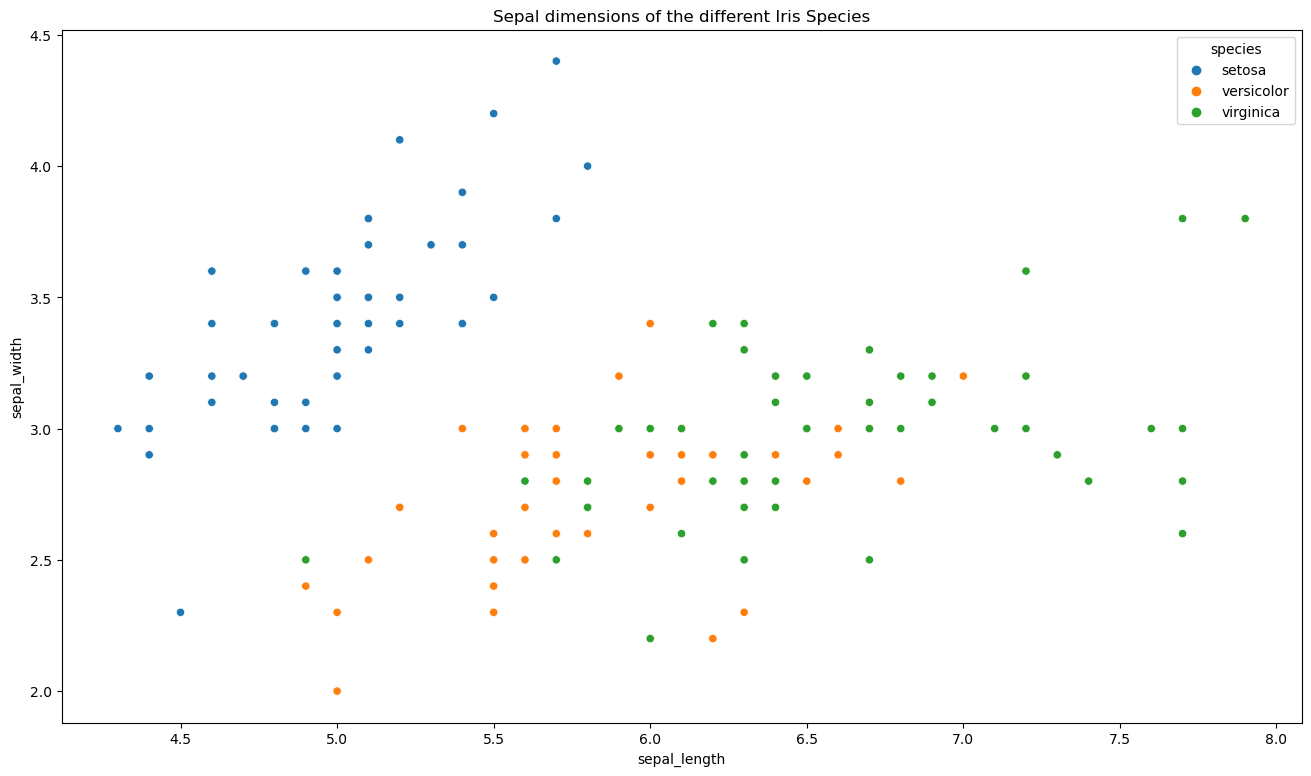

In [158]:
plt.figure(figsize=(16,9))
plt.title('Sepal dimensions of the different Iris Species')
sns.scatterplot(data=iris,
                x='sepal_length',
                y='sepal_width',
                hue='species')
plt.show()

#### - Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

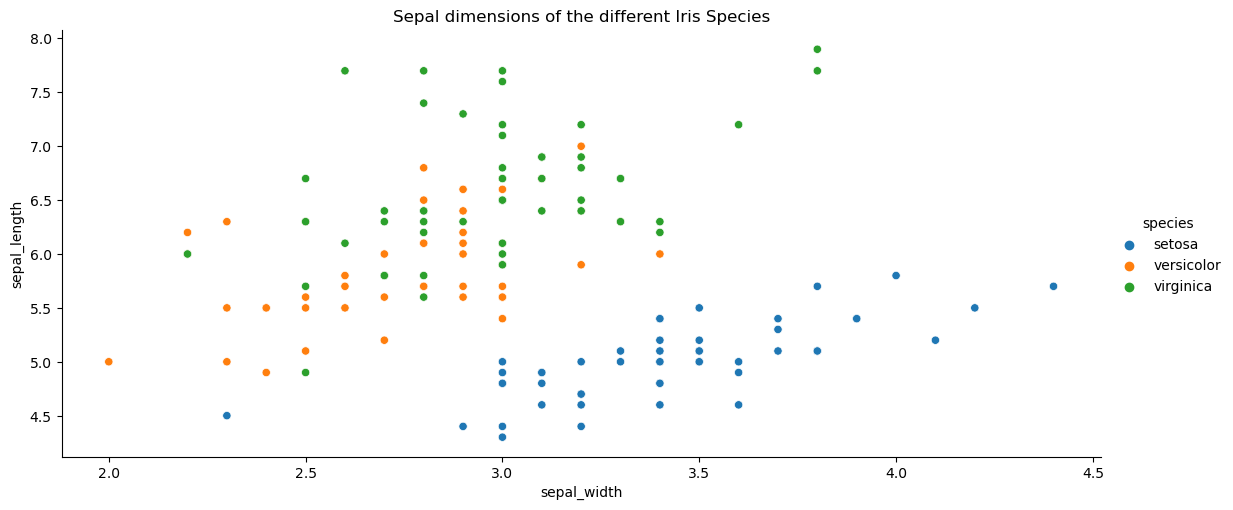

In [159]:
sns.relplot(data=iris,
            x='sepal_width',
            y='sepal_length',
            hue='species',
            aspect=9/4)
plt.title('Sepal dimensions of the different Iris Species')
plt.show()

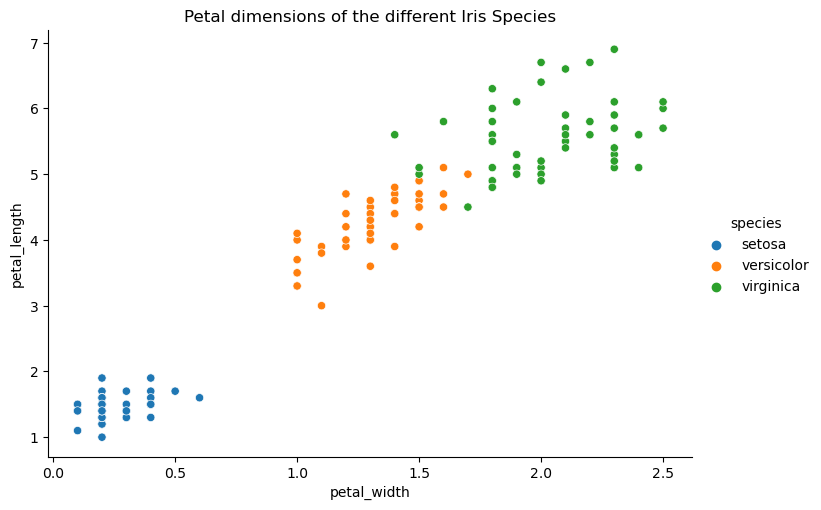

In [160]:
sns.relplot(data=iris,
            x='petal_width',
            y='petal_length',
            hue='species',
            aspect=5/3.5)
plt.title('Petal dimensions of the different Iris Species')
plt.show()

#### - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

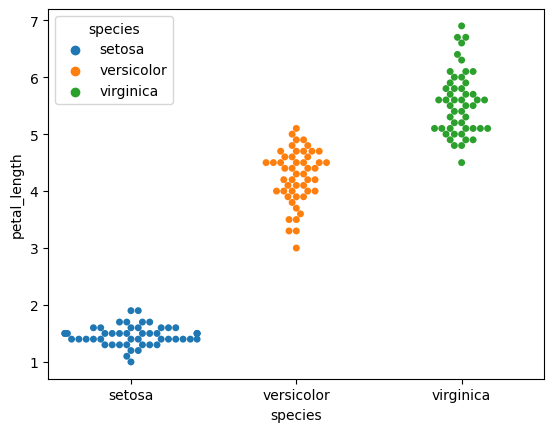

In [161]:
sns.swarmplot(
data=iris,
x='species',
y='petal_length',
hue='species')
plt.show()

#### - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

#### QUESTION: **Is the `setosa` species easily distigushed from the rest of the species of Iris?**


### $H_0$: There is no difference in the mean measurements from the species tested.

### $H_a$:There is a signficant difference in mean measurements from the species tested.

In [162]:
column_to_compare = 'petal_length'  # Replace this with the column you're interested in

sample_virginica = train_iris[train_iris.species == 'virginica'][column_to_compare].dropna()
sample_versicolor = train_iris[train_iris.species == 'versicolor'][column_to_compare].dropna()

stat, p_val = stats.mannwhitneyu(sample_virginica, sample_versicolor)

if p_val < 0.05:
    print('We can reject the null hypothesis; the distributions are different.')
else:
    print('We cannot reject the null hypothesis')

We can reject the null hypothesis; the distributions are different.


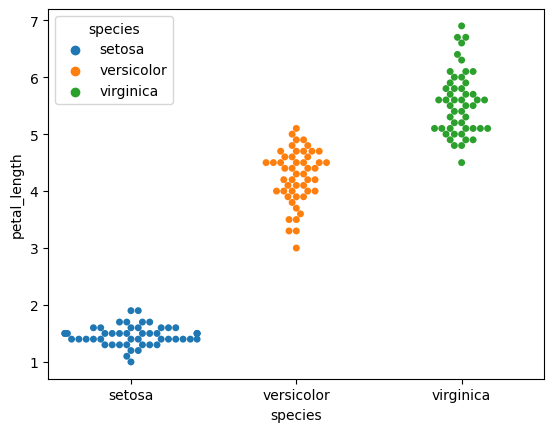

In [163]:
sns.swarmplot(
data=iris,
x='species',
y='petal_length',
hue='species')
plt.show()

### - Document takeaways and any actions.

- Setosas' petal length teseted never measured more than 2.
- versicolors' petal length tested was never less than 3.0
- virginicas' petal length is the largest most of the time.

- there seems to be a visible difference in the petal lenghts between these particular species of iris tested.

## Part II
#### Explore your `titanic` dataset more completely.

In [164]:
titanic_df=pd.read_sql("select * from passengers", get_db_url('titanic_db'))
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


#### - Determine drivers of the target variable

In [165]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [166]:
# lets get the sum of missing values by column:
titanic_df.isna().sum(axis=0)[titanic_df.isna().sum(axis=0) > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [167]:
# how may we impute an age?:
# imputation refers to filling missing values here:
round(titanic_df.age.mode())

0    24.0
Name: age, dtype: float64

In [168]:
titanic_df.loc[:,'age'] = titanic_df.age.fillna('24.0').astype(float)

In [169]:
titanic_df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [170]:
# drivers to survived or not seem to be sex, fare, and pclass.

#### - Determine if certain columns should be dropped

In [171]:
#will be removing the following columns
titanic = titanic_df.drop(columns='deck')
titanic = titanic.drop(columns='embarked')
titanic = titanic.drop(columns='class')
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1


In [172]:
#for the Nan values in the embark_town, i will be filling the values with the most common town as it is a very small number.
titanic.loc[:, 'embark_town'] = titanic.embark_town.fillna('Southampton')

#### - Determine if it would be valuable to bin some numeric columns

In [179]:
# added a column that divides fare to the total in tickets bough in that transaction
titanic['fare_x_pass'] = titanic['fare'] / (titanic['sibsp'] + titanic['parch'] + titanic['alone']).astype(float)

In [174]:
titanic.head(50)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,fare_x_pass
0,0,0,3,male,22.0,1,0,7.2500,Southampton,0,7.250000
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,71.283300
2,2,1,3,female,26.0,0,0,7.9250,Southampton,1,7.925000
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0,53.100000
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1,8.050000
5,5,0,3,male,24.0,0,0,8.4583,Queenstown,1,8.458300
6,6,0,1,male,54.0,0,0,51.8625,Southampton,1,51.862500
7,7,0,3,male,2.0,3,1,21.0750,Southampton,0,5.268750
8,8,1,3,female,27.0,0,2,11.1333,Southampton,0,5.566650
9,9,1,2,female,14.0,1,0,30.0708,Cherbourg,0,30.070800


In [176]:
# Check the range of your data:
min_val = titanic['fare_x_pass'].min()
max_val = titanic['fare_x_pass'].max()

print(f"Minimum value in 'fare_x_pass': {min_val}")
print(f"Maximum value in 'fare_x_pass': {max_val}")


Minimum value in 'fare_x_pass': 0.0
Maximum value in 'fare_x_pass': 512.3292


In [181]:
# Adjust bin edges if necessary based on the min and max values
bin_edges = [-1, 9, 26, 520]

# Create bins for 'fare_x_pass' based on custom bin edges
titanic['fare_bins'] = pd.cut(titanic['fare_x_pass'], bins=bin_edges, labels=['Low', 'Medium', 'High'], right=False)

titanic


,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,fare_x_pass,fare_bins
0,0,3,male,22.0,1,0,7.2500,Southampton,0,7.250000,Low
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,71.283300,High
2,1,3,female,26.0,0,0,7.9250,Southampton,1,7.925000,Low
3,1,1,female,35.0,1,0,53.1000,Southampton,0,53.100000,High
4,0,3,male,35.0,0,0,8.0500,Southampton,1,8.050000,Low
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1,13.000000,Medium
887,1,1,female,19.0,0,0,30.0000,Southampton,1,30.000000,High
888,0,3,female,NaN,1,2,23.4500,Southampton,0,7.816667,Low
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,30.000000,High


#### - Determine if it would be valuable to combine multiple columns into one.

i ended up combining 'parch', 'sibsp', and alone to calculate the total number of tickets per transaction.
then i took the 'fare' and divided it by the total number of tickets bought in that fare price.

#### Does it make sense to combine any features?

In [183]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,fare_x_pass,fare_bins
0,0,3,male,22.0,1,0,7.2500,Southampton,0,7.2500,Low
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,71.2833,High
2,1,3,female,26.0,0,0,7.9250,Southampton,1,7.9250,Low
3,1,1,female,35.0,1,0,53.1000,Southampton,0,53.1000,High
4,0,3,male,35.0,0,0,8.0500,Southampton,1,8.0500,Low


#### Do you find any surprises?

In [182]:
# Fare total need to be divied into total people in the group
# Parch and sibsp are related and fare was more than likely combined.


pd.crosstab(titanic.fare_bins, titanic.survived)

survived,0,1
fare_bins,,
Low,312,89
Medium,142,103
High,95,150


#### Document any and all findings and takeaways in your notebook using markdown.

## Part III

#### - Explore your `telco` data to discover drivers of churn

#### - Determine if certain columns should be dropped

#### - Determine if it would be valuable to bin some numeric columns

#### - Determine if it would be valuable to combine multiple columns into one.

### What are your drivers of churn?

### Does it make sense to combine any features?

### Do you find any surprises?

### Document any and all findings and takeaways in your notebook using markdown.